## Formative 3

## Group members:
1. Minghe SHI
2. Xiaodelong CAI
3. Laize KAI

In [571]:
from sympy import Symbol, Function, dsolve, lambdify, simplify, Eq, classify_ode, pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The general functions

\begin{align}
m\ddot{x} &= mg - kx - c\dot{x} \tag{1}\\
x_{ss} &= \dfrac{mg}{k} \tag{2}
\end{align}

## Set default parameter values 

In [572]:
## system parameter variables
m = Symbol('m')
g = Symbol('g')
k = Symbol('k')
c = Symbol('c')
x = Symbol('x')
H = Symbol('H')
# independent variable
t = Symbol('t')

In [573]:
# general differential functions
x = Function('x')(t)
xdot = x.diff(t)
xddot = xdot.diff(t)

## General ODE using SymPy

In [574]:
# general ODE
expr = Eq(m*xddot, m*g - k*x - c*xdot)
display(expr)

Eq(m*Derivative(x(t), (t, 2)), -c*Derivative(x(t), t) + g*m - k*x(t))

In [575]:
# substitute parameter values
m = 85
k = 37
c = 10
H = 40
g = 9.8

## Specific ODE with chosen parameter values

In [576]:
# specific ODE with parameter values
expr = Eq(m*xddot, m*g - k*x - c*xdot)
display(expr)

Eq(85*Derivative(x(t), (t, 2)), -37*x(t) - 10*Derivative(x(t), t) + 833.0)

## Specific solution using initial conditions

In [577]:
x_0 = 0
xdot_0 = 0
print(f"initial conditions: x_0 = {x_0}, xdot_0 = {xdot_0}")
result = dsolve(expr, x, hint="factorable", ics={x.subs(t, 0): x_0, xdot.subs(t, 0): xdot_0})
result.rhs

initial conditions: x_0 = 0, xdot_0 = 0


(-2.01528273673935*sin(0.657140707942068*t) - 22.5135135135135*cos(0.657140707942068*t))*exp(-0.0588235294117647*t) + 22.5135135135135

## Create data points and plot

In [578]:
# create a lambda function in order to compute data points
f = lambdify(t, result.rhs, 'numpy')

In [579]:
# calculate steady-state
x_ss = H-m*g/k

In [580]:
x_t = 0

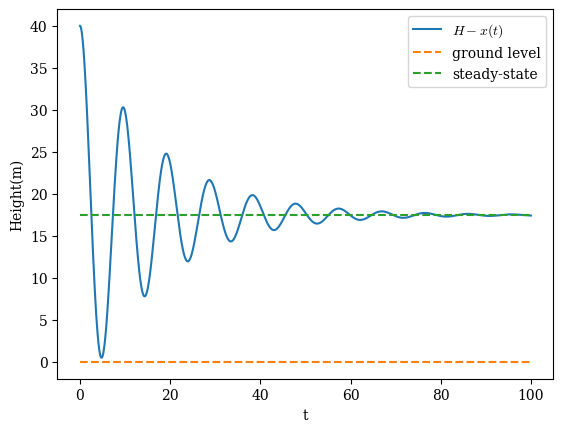

In [581]:
# create data points and basic plot
t = np.linspace(0, 100, 1000)
plt.plot(t, H-f(t), "-", label="$H-x(t)$")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.xlabel('t')
plt.ylabel('Height(m)')
plt.plot([0, np.max(t)], [x_t, x_t], "--", label="ground level")
plt.plot([0, np.max(t)], [x_ss,x_ss],"--", label="steady-state")
plt.legend()
plt.savefig("pendulum.png")
plt.show()

In [582]:
# save the data to a CSV file
df = pd.DataFrame({'t': t, 'y':H-f(t) , 'x':x_ss})
display(df)
df.to_csv('data_theoretical.csv', index_label='i')

,t,y,x
0,0.0000,40.000000,17.486486
1,0.1001,39.951112,17.486486
2,0.2002,39.805423,17.486486
3,0.3003,39.564698,17.486486
4,0.4004,39.231094,17.486486
...,...,...,...
995,99.5996,17.433664,17.486486
996,99.6997,17.431666,17.486486
997,99.7998,17.429929,17.486486
998,99.8999,17.428457,17.486486


##  Creating a user-defined function to find the zero-crossing times in a data set

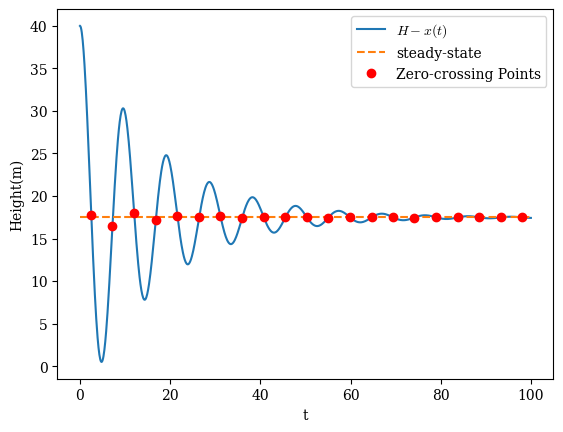

In [583]:
def find_zero_crossings(data):
    crossings = np.where(np.diff(np.sign(data)))[0]
    return crossings
data = pd.read_csv('data_theoretical.csv')
x_ss = H - m * 9.8 / k
data['x_minus_xss'] = data['y'] - x_ss
zero_crossings = find_zero_crossings(data['x_minus_xss'])
plt.plot(data['t'], data['y'], "-", label="$H-x(t)$")
plt.plot([0, np.max(t)], [x_ss,x_ss],"--", label="steady-state")
plt.plot(data['t'][zero_crossings], data['y'][zero_crossings], 'ro', label="Zero-crossing Points")
plt.xlabel('t')
plt.ylabel('Height(m)')
plt.legend()

# Show plot
plt.show()

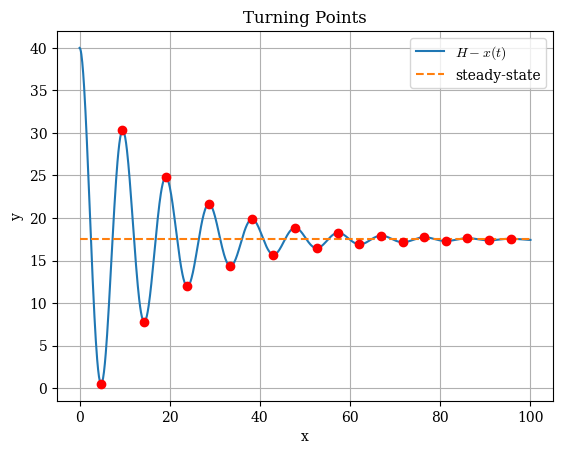

In [602]:
def find_turning_points(x_values, y_values):
    """
    Find the turning points of a given function defined by arrays of x and y values.
    
    Parameters:
        x_values (numpy.ndarray): Array of x values.
        y_values (numpy.ndarray): Array of y values corresponding to the x values.
        
    Returns:
        List of turning points (tuples of x and y coordinates).
    """
    # Calculate the first derivative using central differences
    dy_dx = np.gradient(y_values, x_values)
    
    # Find the points where the first derivative equals zero
    zero_crossings = np.where(np.diff(np.sign(dy_dx)))[0]
    
    # Find turning points by checking the sign of the second derivative
    turning_points = []
    for idx in zero_crossings:
        if dy_dx[idx - 1] * dy_dx[idx + 1] < 0:
            x_turning_point = x_values[idx]
            y_turning_point = y_values[idx]
            turning_points.append((x_turning_point, y_turning_point))
    
    return turning_points

# Load data from CSV file
data = pd.read_csv('data_theoretical.csv')  # Replace 'your_data.csv' with the actual filename

# Extract x and y values from the DataFrame
x_values = data['t'].values
y_values = data['y'].values

# Find turning points
turning_points = find_turning_points(x_values, y_values)

# Plot the data
plt.plot(x_values, y_values, label='$H-x(t)$')
plt.plot([0, np.max(t)], [x_ss,x_ss],"--", label="steady-state")

# Plot turning points
for point in turning_points:
    plt.plot(point[0], point[1], 'ro')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Turning Points')
plt.legend()
plt.grid(True)
plt.show()
